<a href="https://colab.research.google.com/github/Ronakb12/Disaster-Tweets/blob/main/disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle competitions download -c nlp-getting-started

  0% 0.00/593k [00:00<?, ?B/s]
100% 593k/593k [00:00<00:00, 137MB/s]


In [ ]:
! unzip nlp-getting-started

Archive:  nlp-getting-started.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import pandas as pd

df = pd.read_csv("train.csv")
df.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
df.groupby('target').describe()

id                                                           \
         count         mean          std   min      25%     50%     75%   
target                                                                    
0       4342.0  5276.446338  3157.206802  23.0  2513.25  5243.5  8038.5   
1       3271.0  5661.608071  3097.094809   1.0  3104.50  5676.0  8252.0   

                 
            max  
target           
0       10848.0  
1       10873.0

In [ ]:
df = df.drop_duplicates("text",keep='last')

df.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
df.groupby('target').describe()

id                                                           \
         count         mean          std   min      25%     50%     75%   
target                                                                    
0       4307.0  5279.589041  3162.752369  23.0  2493.00  5243.0  8058.0   
1       3196.0  5670.232478  3104.735104   1.0  3100.75  5691.0  8263.0   

                 
            max  
target           
0       10848.0  
1       10873.0

In [ ]:
# df['location']=df['location'].fillna('No data')
# df['keyword']=df['keyword'].fillna('No data')

In [ ]:
df.text

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 7503, dtype: object

In [ ]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test= train_test_split(df["text"],df["target"],test_size=0.1, stratify=df['target'])

In [ ]:
# X_train.shape,y_train.shape

In [ ]:
# !pip install tensorflow==2.8

In [ ]:
import tensorflow as tf

In [ ]:
batch_size = 32
train_ds = tf.data.Dataset.from_tensor_slices((df["text"].tolist(),df['target'].tolist())).batch(batch_size)

In [ ]:
!pip install tensorflow_text==2.8.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow_hub as hub
import tensorflow_text as text

In [ ]:
!nvidia-smi

Tue May 24 05:43:04 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P0    27W /  70W |    266MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
preprocess_url = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"
encoder_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4"

In [ ]:
bert_preprocessor = hub.KerasLayer(preprocess_url, name='preprocessing')
bert_encoder = hub.KerasLayer(encoder_url,trainable=True, name='BERT_encoder')

In [ ]:
def get_sentence_embeding(sentences):
    preprocessed_text = bert_preprocessor(sentences)
    return bert_encoder(preprocessed_text)['pooled_output']

In [ ]:
text_input = ['nice movie indeed','I love pythonprogramming']

In [ ]:
get_sentence_embeding(text_input)

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.7917738 , -0.214119  ,  0.4976956 , ...,  0.24465248,
        -0.4733446 ,  0.8175866 ],
       [-0.8765388 , -0.37150812, -0.4443346 , ..., -0.40630314,
        -0.6290715 ,  0.90643543]], dtype=float32)>

In [ ]:
def create_model():
    text_input=tf.keras.layers.Input(shape=(), dtype=tf.string, name='text_input')

    preprocessed_text = bert_preprocessor(text_input)
    outputs = bert_encoder(preprocessed_text)

    drop = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
    output = tf.keras.layers.Dense(1, activation="sigmoid", name='output')(drop)

    model = tf.keras.Model(
        inputs =[text_input],
        outputs=output)
    return model

In [ ]:
epochs = 3

model = create_model()

model.compile(optimizer=tf.keras.optimizers.Adam(3e-5),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics= [tf.keras.metrics.BinaryAccuracy()])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text_input (InputLayer)        [(None,)]            0           []                               
                                                                                                  
 preprocessing (KerasLayer)     {'input_mask': (Non  0           ['text_input[0][0]']             
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128)}                                                  

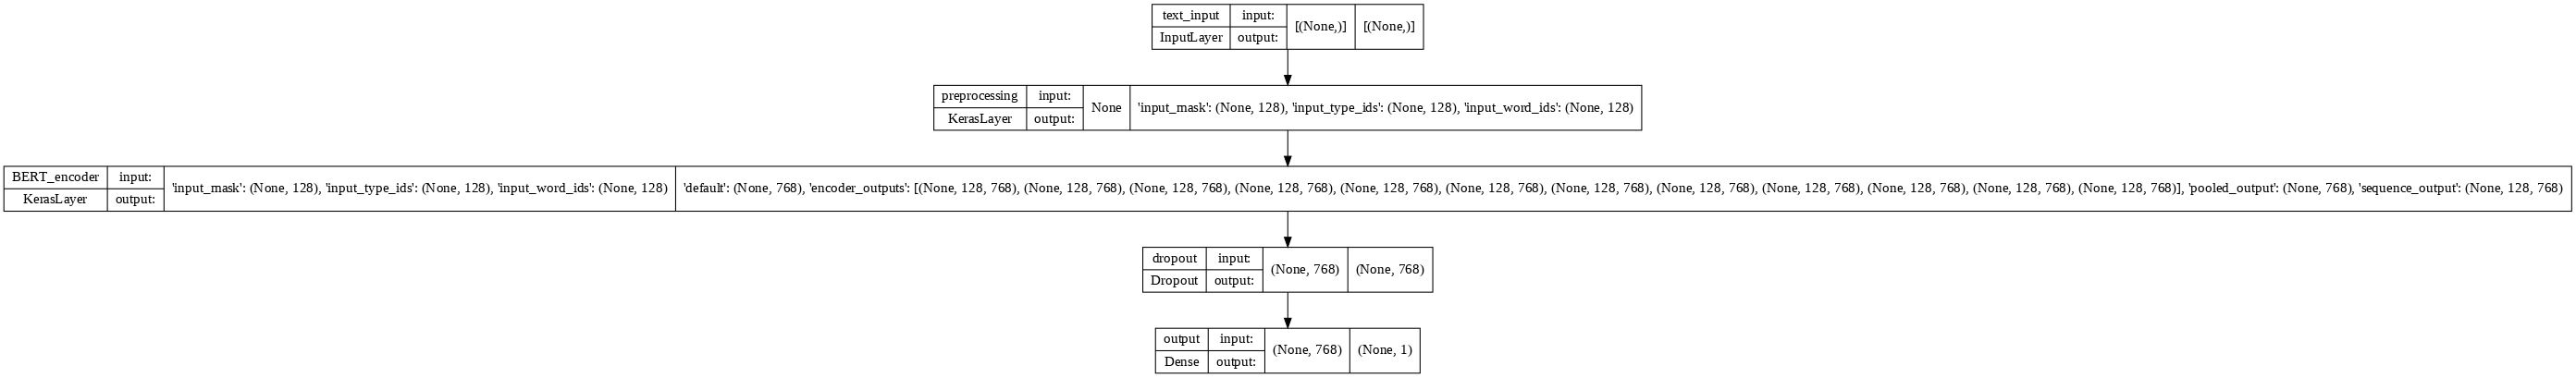

In [ ]:
tf.keras.utils.plot_model(model=model, show_shapes=True, dpi=76)

In [ ]:
history = model.fit(x=train_ds, epochs = epochs)

Epoch 1/3
235/235 [==============================] - 214s 852ms/step - loss: 0.4960 - binary_accuracy: 0.7840
Epoch 2/3
235/235 [==============================] - 202s 861ms/step - loss: 0.3647 - binary_accuracy: 0.8554
Epoch 3/3
235/235 [==============================] - 202s 862ms/step - loss: 0.2810 - binary_accuracy: 0.8932


In [ ]:
 # model.evaluate(X_test, y_test)

In [ ]:
df_ = pd.read_csv("test.csv")
df_.head(5)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
X = df_["text"]

In [ ]:
y=model.predict(X)

In [ ]:
y

array([[0.9801767 ],
       [0.9980203 ],
       [0.997964  ],
       ...,
       [0.9983575 ],
       [0.90635574],
       [0.97274745]], dtype=float32)

In [ ]:
df_["target"] = [1 if x>0.5 else 0 for x in y]
df_.head(10)

,id,keyword,location,text,target
0,0,NaN,NaN,Just happened a terrible car crash,1
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",1
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",1
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,1
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,1
5,12,NaN,NaN,We're shaking...It's an earthquake,1
6,21,NaN,NaN,They'd probably still show more life than Arse...,0
7,22,NaN,NaN,Hey! How are you?,0
8,27,NaN,NaN,What a nice hat?,0
9,29,NaN,NaN,Fuck off!,0


In [ ]:
df_ = df_.drop(['location','keyword','text'], axis=1)

In [ ]:
df_.to_csv('/content/sample_data/out4.csv',index=False)


In [ ]:
def create_w_hidden_model():
    text_input=tf.keras.layers.Input(shape=(), dtype=tf.string, name='text_input')

    preprocessed_text = bert_preprocessor(text_input)
    outputs = bert_encoder(preprocessed_text)

    hidden_layer = tf.keras.layers.Dense(32, activation="relu", name='hidden')(outputs['pooled_output'])

    drop = tf.keras.layers.Dropout(0.2, name="dropout")(hidden_layer)
    output = tf.keras.layers.Dense(1, activation="sigmoid", name='output')(drop)

    model = tf.keras.Model(
        inputs =[text_input],
        outputs=output)
    return model

h_model = create_w_hidden_model()
h_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 3e-5),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics= [tf.keras.metrics.BinaryAccuracy()])
h_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text_input (InputLayer)        [(None,)]            0           []                               
                                                                                                  
 preprocessing (KerasLayer)     {'input_mask': (Non  0           ['text_input[0][0]']             
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128)}                                                

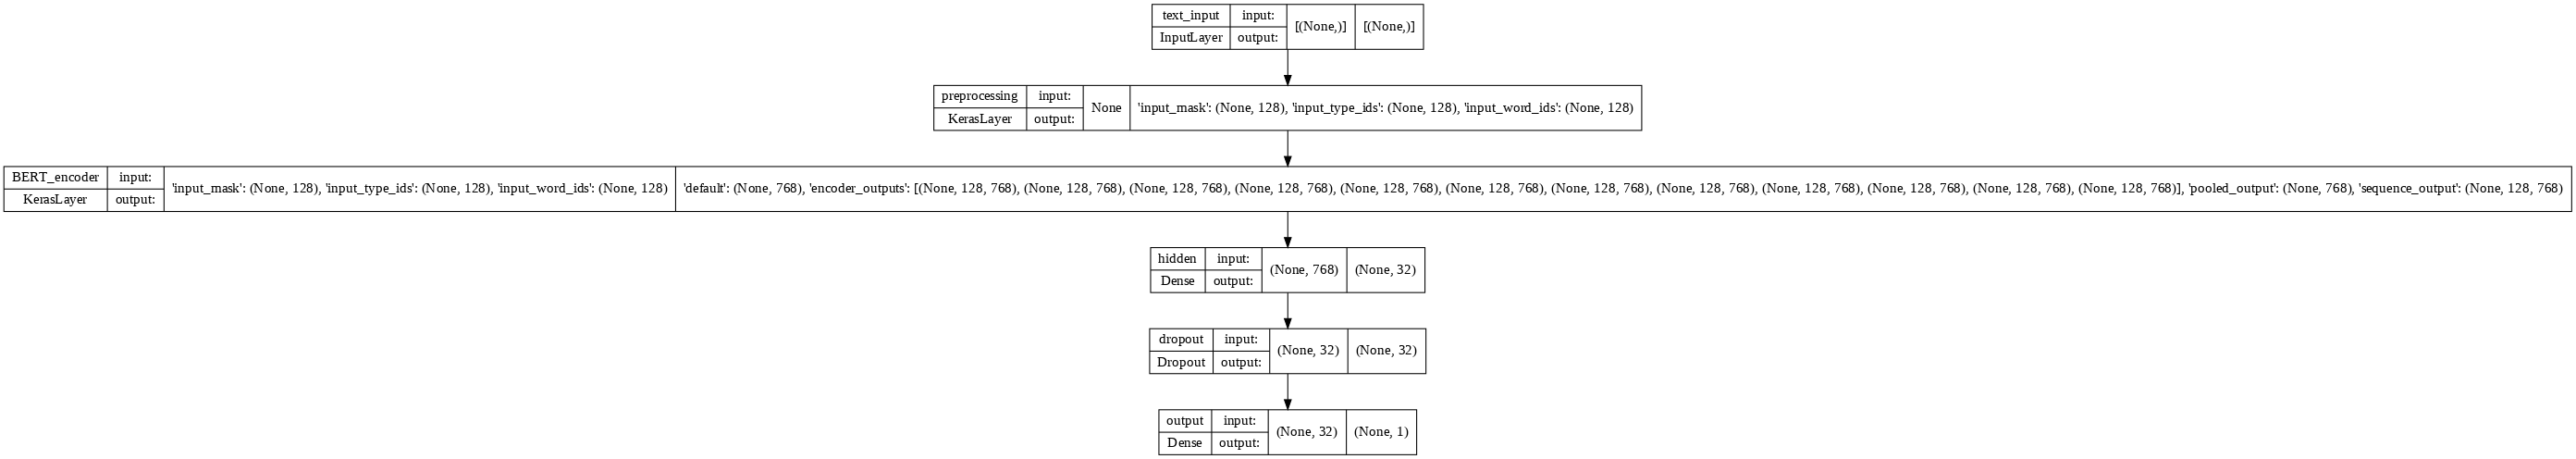

In [ ]:
tf.keras.utils.plot_model(model=h_model, show_shapes=True, dpi=76)

In [ ]:
h_history = h_model.fit(train_ds, epochs = epochs, batch_size=10)

Epoch 1/3
235/235 [==============================] - 217s 863ms/step - loss: 0.2327 - binary_accuracy: 0.9176
Epoch 2/3
235/235 [==============================] - 203s 863ms/step - loss: 0.1653 - binary_accuracy: 0.9451
Epoch 3/3
235/235 [==============================] - 203s 863ms/step - loss: 0.1214 - binary_accuracy: 0.9571


In [ ]:
h_model.evaluate(X, y)

102/102 [==============================] - 36s 346ms/step - loss: 0.4510 - binary_accuracy: 0.0000e+00


[0.45100659132003784, 0.0]

In [ ]:
df__ = pd.read_csv("test.csv")
df__.head(5)

In [ ]:
X=df__["text"]

In [ ]:
y=h_model.predict(X)

In [ ]:
df__["target"] = [1 if x>0.5 else 0 for x in y]
df__.head(10)

,id,keyword,location,text,target
0,0,NaN,NaN,Just happened a terrible car crash,1
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",1
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",1
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,1
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,1
5,12,NaN,NaN,We're shaking...It's an earthquake,0
6,21,NaN,NaN,They'd probably still show more life than Arse...,0
7,22,NaN,NaN,Hey! How are you?,0
8,27,NaN,NaN,What a nice hat?,0
9,29,NaN,NaN,Fuck off!,0


In [ ]:
df__=df__.drop(['location','keyword','text'], axis=1)

In [ ]:
df__.to_csv('/content/sample_data/_out4.csv',index=False)
